<a href="https://colab.research.google.com/github/xxmcs/thinkful_projects/blob/main/Copy_of_E5_Unsupervised_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sqlalchemy import create_engine
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import time
#!pip install umap-learn
import umap
import warnings
warnings.filterwarnings('ignore')

# **1. Read in Dataset**

##This is a credit card dataset from Kaggle. The goal of this project is to develop a customer segmentation to define credit card marketing strategy using this dataset. The dataset summarizes total 18 usage behavior (18 features) of about 9000 active credit card holders during the last 6 months. 

The dataset link is as below:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
df = pd.read_csv('dataset/CC_GENERAL.csv')

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# checking for missing value
df.isnull().sum()/(df.shape[0])*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [ ]:
#as the nan value is about 3.5%, here we will drop the nan value

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [ ]:
# drop the "customer_ID" column
df.columns[1:]
df_1 = df[df.columns[1:]]
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
#normalize the dataset

In [ ]:
scalar = StandardScaler()
df_scl = scalar.fit_transform(df_1)

In [ ]:
df_scl

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

#  **2. Dimensionality reduction**

In [ ]:
#define scatter plot visualization function
def plt_dim_redc(reduction):
    plt.figure(figsize=(10, 5))
    plt.scatter(reduction[:,0], reduction[:,1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

In [ ]:
# we tried different dimentionality reduction methods: (1)PCA; (2)t-SNE; (3)UMAP for dimentionality reduction

##(1) PCA

In [ ]:
#Let's try an inital PCA without setting up the components and see how explained variance changes with 
#number of principle components
np.random.seed(123)
pca_df2 = PCA()
pca_df2.fit_transform(df_scl)

array([[-1.69639528e+00, -1.12258398e+00,  4.91561567e-01, ...,
         1.37453689e-01,  4.66832450e-02, -1.67762795e-04],
       [-1.21568083e+00,  2.43563777e+00,  6.94657855e-01, ...,
        -5.58965425e-01, -8.56983025e-02,  6.90302629e-06],
       [ 9.35853289e-01, -3.85201566e-01, -2.59532859e-02, ...,
         2.21005694e-01,  5.16991411e-01,  2.13407361e-05],
       ...,
       [-9.30026248e-01, -1.84123564e+00, -3.50037086e-01, ...,
         4.83380156e-01,  1.52734226e-01, -1.70653181e-04],
       [-2.35600968e+00, -7.18730150e-01,  1.04852241e+00, ...,
         3.00678552e-01, -1.98467826e-01, -8.55124077e-05],
       [-5.96818230e-01, -4.46019433e-01,  1.10524573e+00, ...,
        -3.76692542e-01,  3.52411702e-01, -9.59692840e-05]])

In [ ]:
pca_df2.explained_variance_ratio_

array([2.72311770e-01, 2.03743076e-01, 8.91833372e-02, 7.57360860e-02,
       6.27661816e-02, 5.71278613e-02, 4.91618788e-02, 4.21073427e-02,
       3.68169669e-02, 3.08150790e-02, 2.36380362e-02, 1.77453962e-02,
       1.42671026e-02, 1.17865972e-02, 1.00809717e-02, 2.71162672e-03,
       6.90045972e-07])

In [ ]:
#plot the variance PCA explains versus the components

Text(0.5, 1.0, 'explained variance ratio VS. number of principle components')

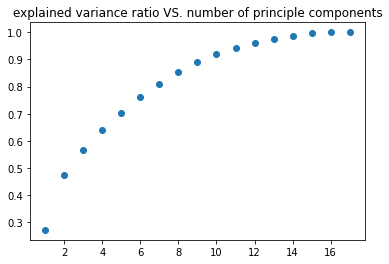

In [ ]:
plt.scatter(np.arange(1, 18, 1), pca_df2.explained_variance_ratio_.cumsum())
plt.title('explained variance ratio VS. number of principle components')

In [ ]:
#As expected, with more components, the PCA can explain more variance. 
#Also, if having 2 components, the variance that explained by PCA is around 0.5.

In [ ]:
#since one of the reason we want to use dimentionality reduction, we will
#use n_component = 2

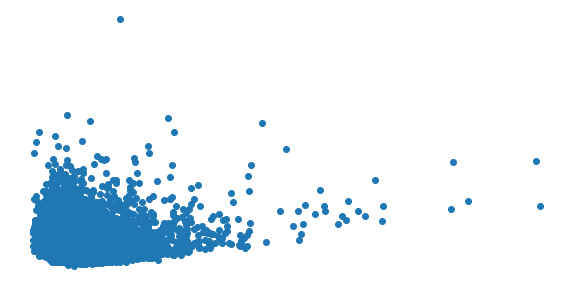

In [ ]:
#Let's scatter plot the PCA output
plt_dim_redc(pca_df)

In [ ]:
# As can be seen, it seems that the data is not effectively separated using PCA. 
# Let's try other dimentionality reduction methods

##(2) t-SNE

In [ ]:
np.random.seed(123)
tsne_df = TSNE(n_components=2, perplexity=35, n_iter=300).fit_transform(df_scl)

C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


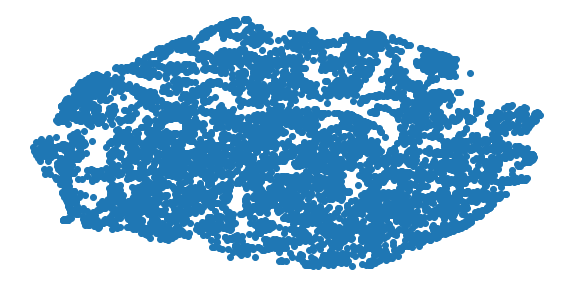

In [ ]:
#Let's scatter plot the t-SNE output
plt_dim_redc(tsne_df)

In [ ]:
#it looks slightly better than PCA. Let's do some hyperparameter tuning

C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\zhang\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnin

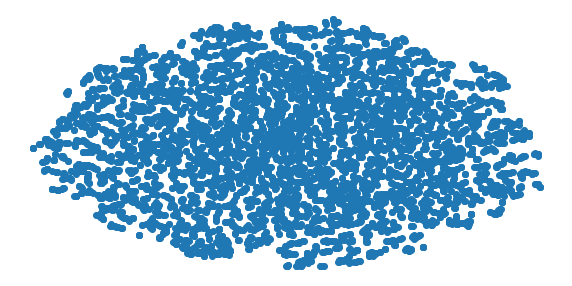

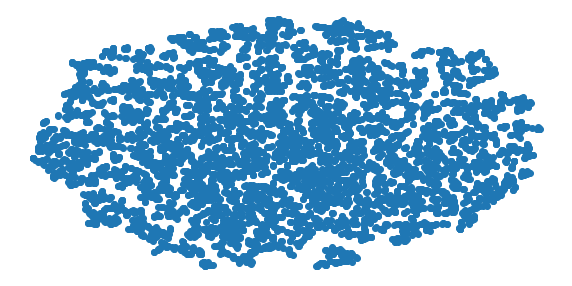

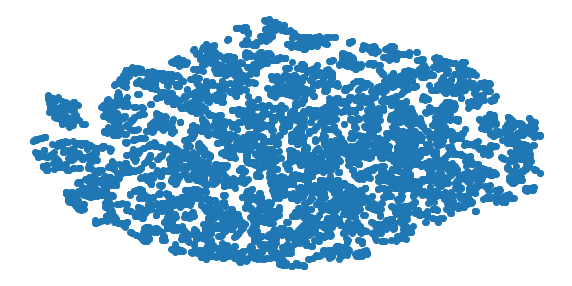

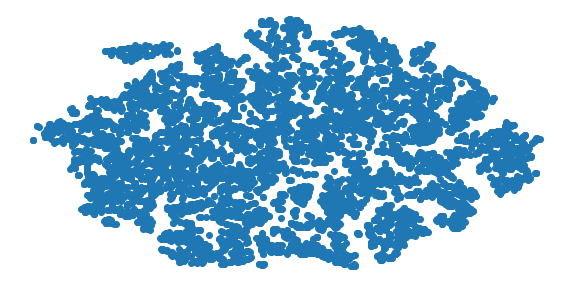

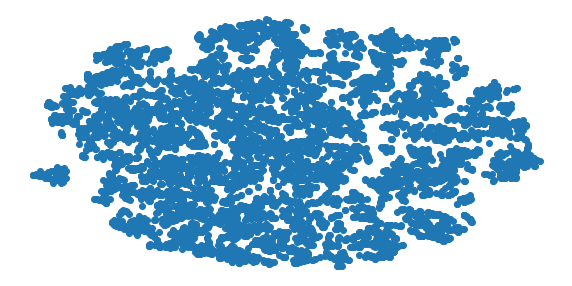

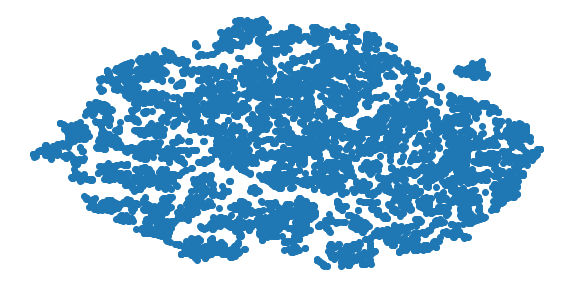

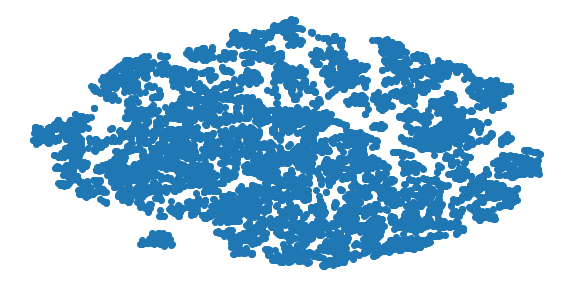

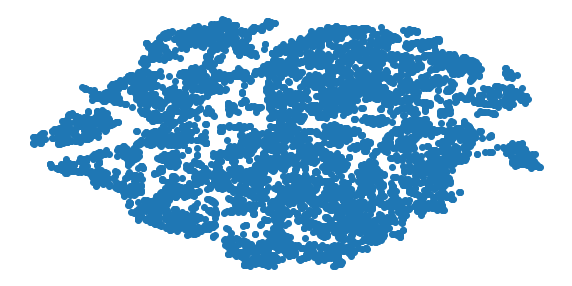

In [ ]:
# one of the most important parameter for t-SNE is perplexity. Let's tunning this parameter
for i in np.arange(5, 42, 5):
    tsne_df = TSNE(n_components=2, perplexity=i, n_iter=500).fit_transform(df_scl)
    plt_dim_redc(tsne_df)

In [ ]:
#Overall, t-SNE is slightly better to separate the data in 2-dimention. Let's try UMAP method

(8636, 2)

##(3) UMAP

In [ ]:
np.random.seed(123)
umap_df = umap.UMAP(n_components=2,  metric='euclidean').fit_transform(df_scl)

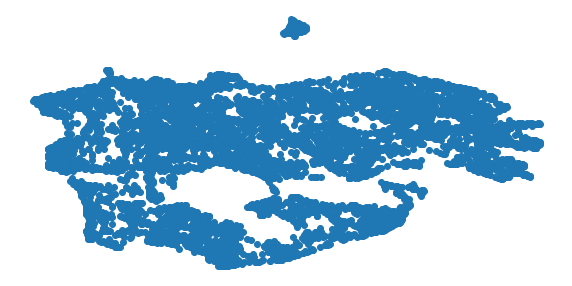

In [ ]:
plt_dim_redc(umap_df)

In [ ]:
#It looks slightly better than t-SNE, and much better than PCA. Let's tunning the parameters

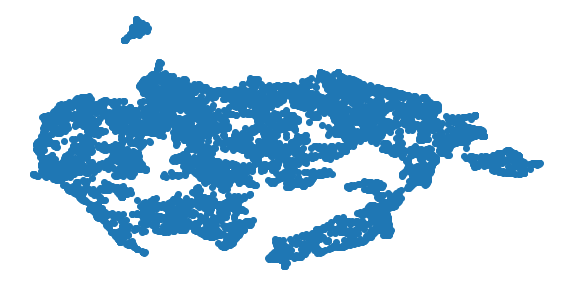

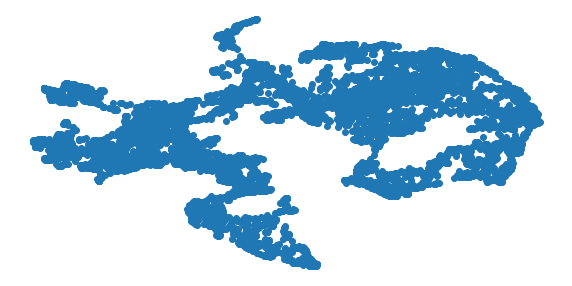

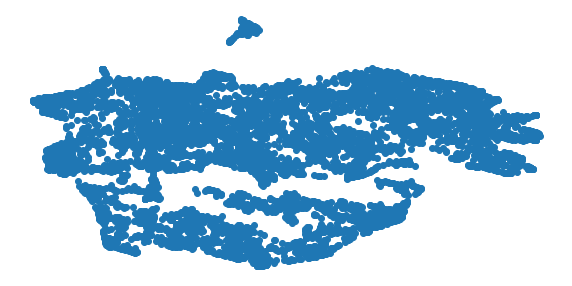

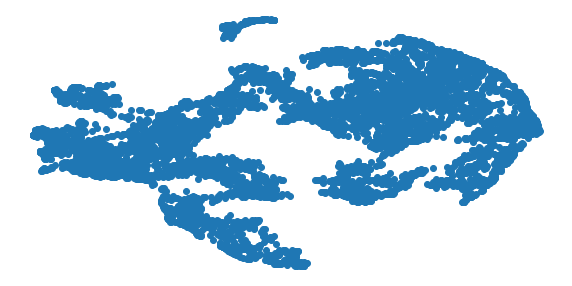

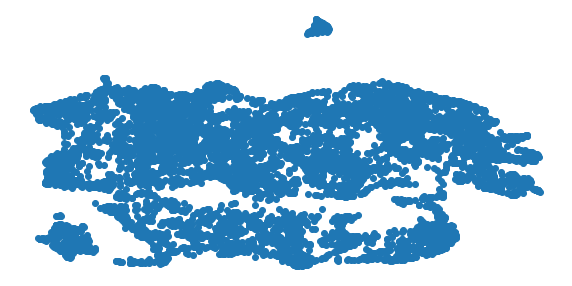

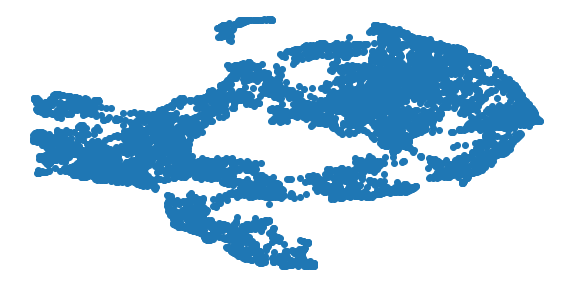

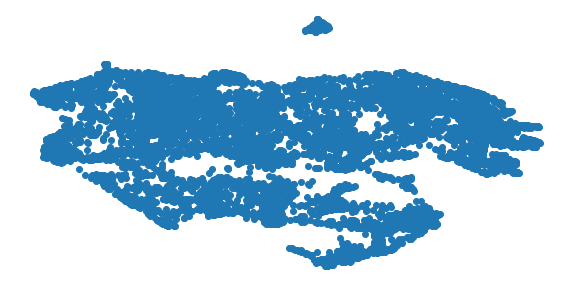

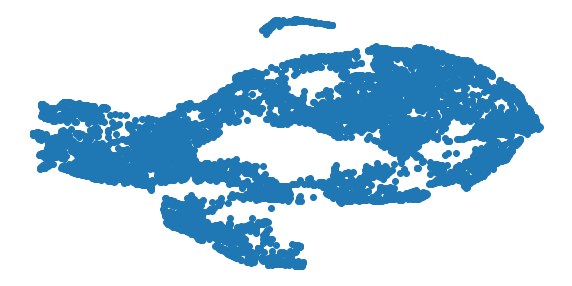

In [ ]:
for i in np.arange(8, 24, 4):
    for j in ['euclidean', 'correlation']:
        umap_df = umap.UMAP(n_neighbors= i, n_components=2, metric=j).fit_transform(df_scl)
        plt_dim_redc(umap_df)

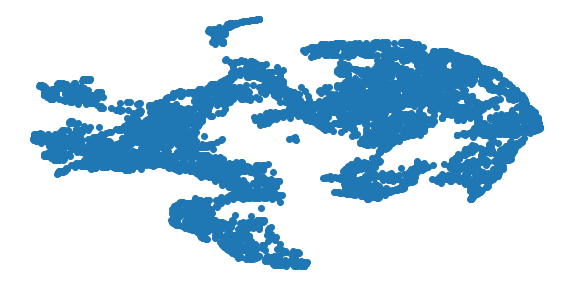

In [ ]:
np.random.seed(123)
umap_df = umap.UMAP(n_components=2,  metric='correlation', n_neighbors=12).fit_transform(df_scl)
plt_dim_redc(umap_df)

Looks like the best one is UMAP with metric='correlation', and n_neighobors = 12.  we will use this UMAP with the above parameter for visualization and some clusting.

# **3. Clustering**

In [ ]:
# we do clustering using different models: (1) Kmeans; (2) agglormerative method; (3) DBSCAN; (4) Gassian mixture model

In [ ]:
#Let's first define 2-D visualization using the output from UMAP
def plt_opt(predic):
    plt.figure(figsize=(10,5))
    colours = np.array(['r', 'b', 'g', 'c', 'm', 'y'])
    plt.scatter(umap_df[:, 0], umap_df[:, 1], c=colours[predic])

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [ ]:
# generate a Silhouette score dataframe for future comparison
sil_score_tot = pd.DataFrame(columns=['silhouette score'], dtype='float64')

## (1) use K-means

In [ ]:
#Let's have an initial Kmean model
#generate Kmeans clustring using orignal dataset (17 features) 
kmeans_cluster = KMeans(n_clusters=3, random_state=123).fit(df_scl)
y_pred_kmeans = kmeans_cluster.predict(df_scl)

In [ ]:
#generate Kmeans clustring using dataset after UMAP (total 2 features) 
kmeans_cluster_umap = KMeans(n_clusters=3, random_state=123).fit(umap_df)
y_pred_kmeans_umap = kmeans_cluster_umap.predict(umap_df)

In [ ]:
print(metrics.silhouette_score(df_scl, y_pred_kmeans, metric='euclidean'))
print(metrics.silhouette_score(umap_df, y_pred_kmeans_umap, metric='euclidean'))

0.24715598708798758
0.45103082


In [ ]:
#Looks like using UMAP output(after dimentionality reduction as input), the Silhouette score is much higher

In [ ]:
#Then let's compare the inertia value. The inertia value is smaller for clustering using UMAP output
print(kmeans_cluster.inertia_)
print(kmeans_cluster_umap.inertia_)

108086.3105675724
79385.28125


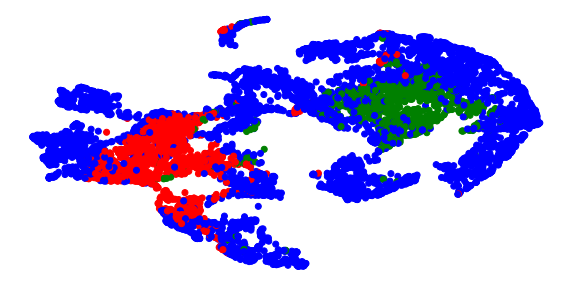

0.24715598708798758


In [ ]:
plt_opt(y_pred_kmeans)

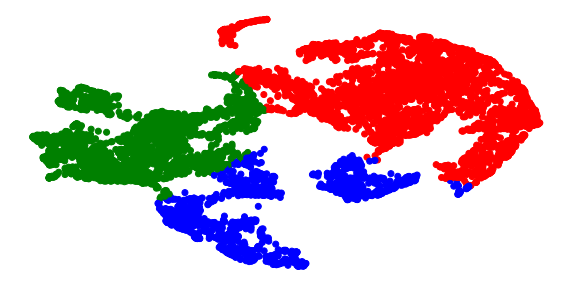

0.46801046


In [ ]:
plt_opt(y_pred_kmeans_umap)

In [ ]:
#From the 2D visualization, the clustering using UMAP output dataset is better separated than using original data
#There could be two reasons:
#(1) After UMAP, the dataset is already better grouped. So use it as input helps a better clustering. e.g. the Silhouette score 
#is higher
#(2) The second reason is that, for the first one, we used 17 features for clustering, but we project it into 2-D visualization,
#for the second one, we only used 2 features after dimentionality reduction for clustering, and we project it into 2-D visualization
# So it's natuallly that the second one has much better 2-D visualization

In [ ]:
# writ the Silhouette score into DataFrame
results = metrics.silhouette_score(umap_df, y_pred_kmeans_umap, metric='euclidean')
sil_score_tot.loc['kmeans_UMAP'] = results

In [ ]:
#hyperparameter tuning, and checking the effect of different clustering number

In [ ]:
sil_score = []
inertia = []
for i in np.arange(2, 12, 1):
    kmean = KMeans(n_clusters=i, random_state=123)
    y_pred = kmean.fit_predict(df_scl)
    sil_score.append(metrics.silhouette_score(df_scl, y_pred, metric='euclidean'))
    inertia.append(kmean.inertia_)
    print('silhouette score of {} cluster: {}'.format(i, metrics.silhouette_score(df_scl, y_pred, metric='euclidean')))
    print('inertia of {} cluster: {}'.format(i, kmean.inertia_))

silhouette score of 2 cluster: 0.20787221404061143
inertia of 2 cluster: 123282.3553258209
silhouette score of 3 cluster: 0.24715598708798758
inertia of 3 cluster: 108086.3105675724
silhouette score of 4 cluster: 0.197253652823019
inertia of 4 cluster: 95646.38179207494
silhouette score of 5 cluster: 0.19197051776252283
inertia of 5 cluster: 88346.774974458
silhouette score of 6 cluster: 0.20080691564022854
inertia of 6 cluster: 81878.76586921478
silhouette score of 7 cluster: 0.2140864170087355
inertia of 7 cluster: 76637.36729098676
silhouette score of 8 cluster: 0.22715498892538252
inertia of 8 cluster: 71560.52562177376
silhouette score of 9 cluster: 0.21620690372629284
inertia of 9 cluster: 68198.847141383
silhouette score of 10 cluster: 0.22523305233300203
inertia of 10 cluster: 63831.49531272822
silhouette score of 11 cluster: 0.22165709086640006
inertia of 11 cluster: 61150.770431195786


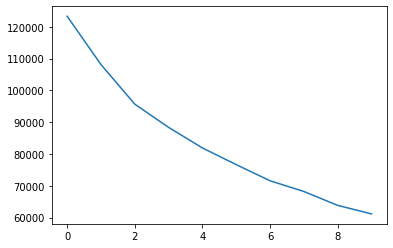

In [ ]:
# plot the inertial VS. how many number of clustering we defined
plt.plot(inertia)

In [ ]:
#so with the increasing number of clustering, the inertia also decreases, this is as expected)

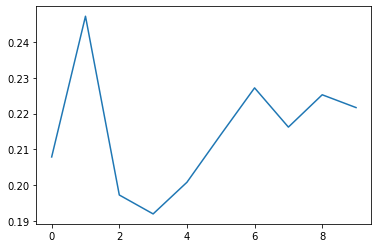

In [ ]:
plt.plot(sil_score)
#overall, with original data as input for clustering, ,the Silhouette score is low

In [ ]:
sil_score = []
inertia = []
for i in np.arange(2, 12, 1):
    kmean = KMeans(n_clusters=i, random_state=123)
    y_pred = kmean.fit_predict(umap_df)
    sil_score.append(metrics.silhouette_score(umap_df, y_pred, metric='euclidean'))
    inertia.append(kmean.inertia_)
    print('silhouette score of {} cluster: {}'.format(i, metrics.silhouette_score(umap_df, y_pred, metric='euclidean')))
    print('inertia of {} cluster: {}'.format(i, kmean.inertia_))

silhouette score of 2 cluster: 0.494709312915802
inertia of 2 cluster: 112530.53125
silhouette score of 3 cluster: 0.46801045536994934
inertia of 3 cluster: 79385.28125
silhouette score of 4 cluster: 0.41453295946121216
inertia of 4 cluster: 55919.88671875
silhouette score of 5 cluster: 0.42584386467933655
inertia of 5 cluster: 42716.48828125
silhouette score of 6 cluster: 0.4226551055908203
inertia of 6 cluster: 35928.5
silhouette score of 7 cluster: 0.43585750460624695
inertia of 7 cluster: 31085.435546875
silhouette score of 8 cluster: 0.40699368715286255
inertia of 8 cluster: 26125.734375
silhouette score of 9 cluster: 0.4078505039215088
inertia of 9 cluster: 23458.462890625
silhouette score of 10 cluster: 0.42883384227752686
inertia of 10 cluster: 20410.15234375
silhouette score of 11 cluster: 0.43177443742752075
inertia of 11 cluster: 17705.0234375


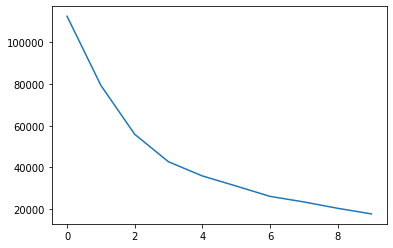

In [ ]:
# plot the inertial VS. how many number of clustering we defined
plt.plot(inertia)

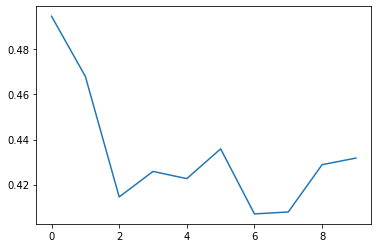

In [ ]:
plt.plot(sil_score)
#overall, with data after UMAP as input for clustering, the Silhouette score is higher than using original dataset

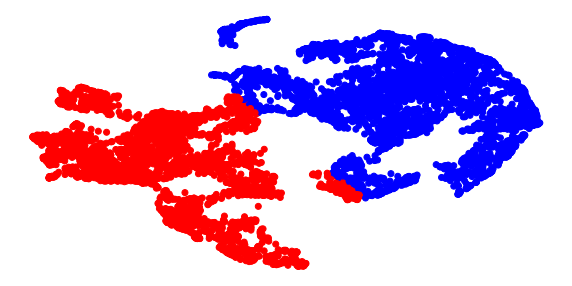

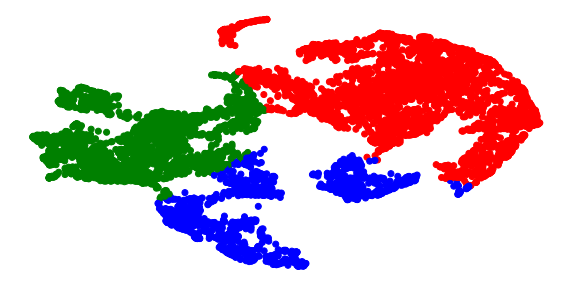

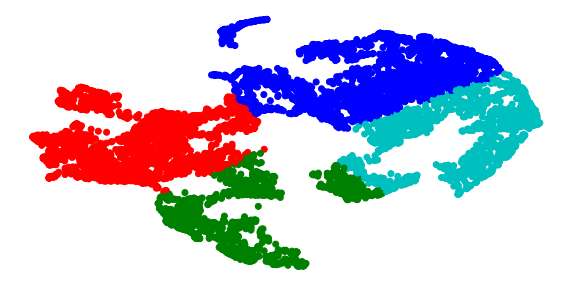

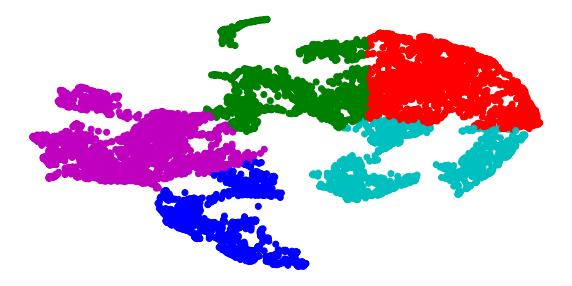

In [ ]:
#Let's visualize it to see how it looks for increasing the clustering.
for i in np.arange(2, 6, 1):
    kmean = KMeans(n_clusters=i, random_state=123)
    y_pred = kmean.fit_predict(umap_df)
    plt_opt(y_pred)

In [ ]:
#From the above investigation with Kmeans, we have these observations:
#(1) using UMAP output for clustering input gives higher Silhouette score and better 2-D visualization
#(2) given more principle component in PCA, more variance can be explained
#(3) the overall pattern of different clusters are similar. 

##(2) Agglomerative clustering

In [ ]:
#let's get an inital agglomerative clustering first using original data after normalization
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      n_clusters=3)

y_pred_agg = agg_cluster.fit_predict(df_scl)
print(metrics.silhouette_score(df_scl, y_pred_agg, metric='euclidean'))

0.17845266791386857


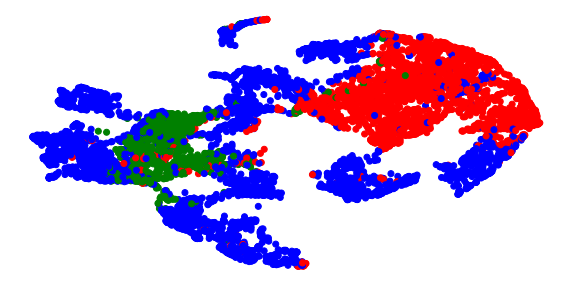

In [ ]:
#  the Silhouette score is not good enough. Let's visualize it
plt_opt(y_pred_agg)

In [ ]:
#using the parameter setting, but input is after UMAP 
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      n_clusters=3)
y_pred_agg_w = agg_cluster.fit_predict(umap_df)
print(metrics.silhouette_score(umap_df, y_pred_agg_w, metric='euclidean'))

# the Silhouette score is higher than original data

0.40638146


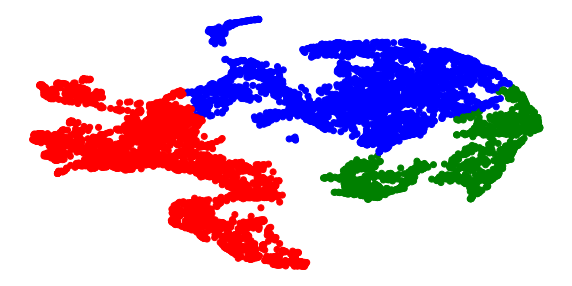

In [ ]:
plt_opt(y_pred_agg_w)
#Looks like using UMAP, the data is well-separated

In [ ]:
#Let's try another linkage method "complete"
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      n_clusters=3)
y_pred_agg_c = agg_cluster.fit_predict(umap_df)
print(metrics.silhouette_score(umap_df, y_pred_agg_c, metric='euclidean'))

0.451788


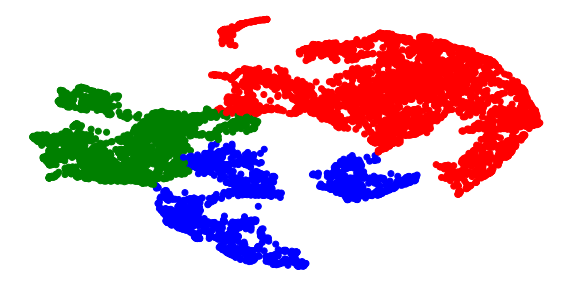

In [ ]:
plt_opt(y_pred_agg_c)

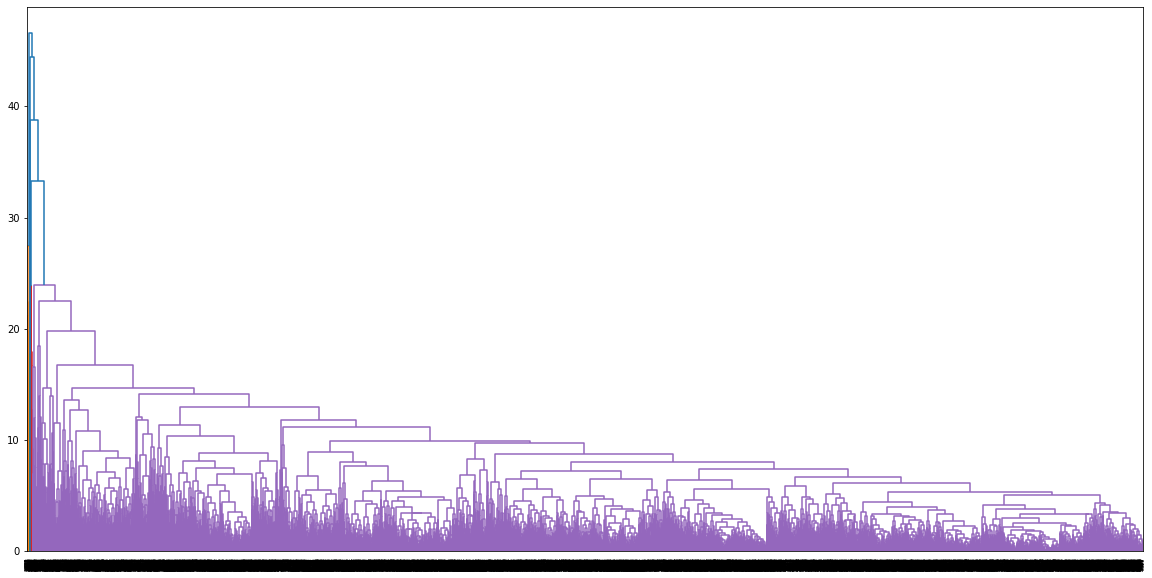

In [ ]:
#plt the dendrogram of data before UMAP with linkage method "complete"
plt.figure(figsize=(20,10))
dendrogram(linkage(df_scl, method='complete'))
plt.show()

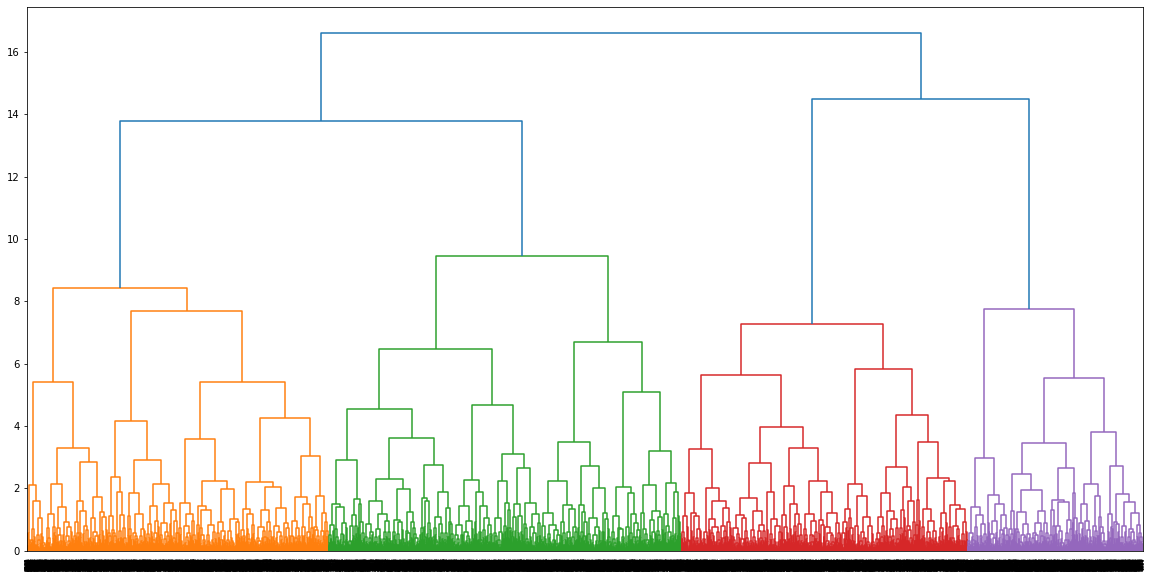

In [ ]:
#plt the dendrogram of data after UMAP with linkage method "complete"
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_df, method='complete'))
plt.show()

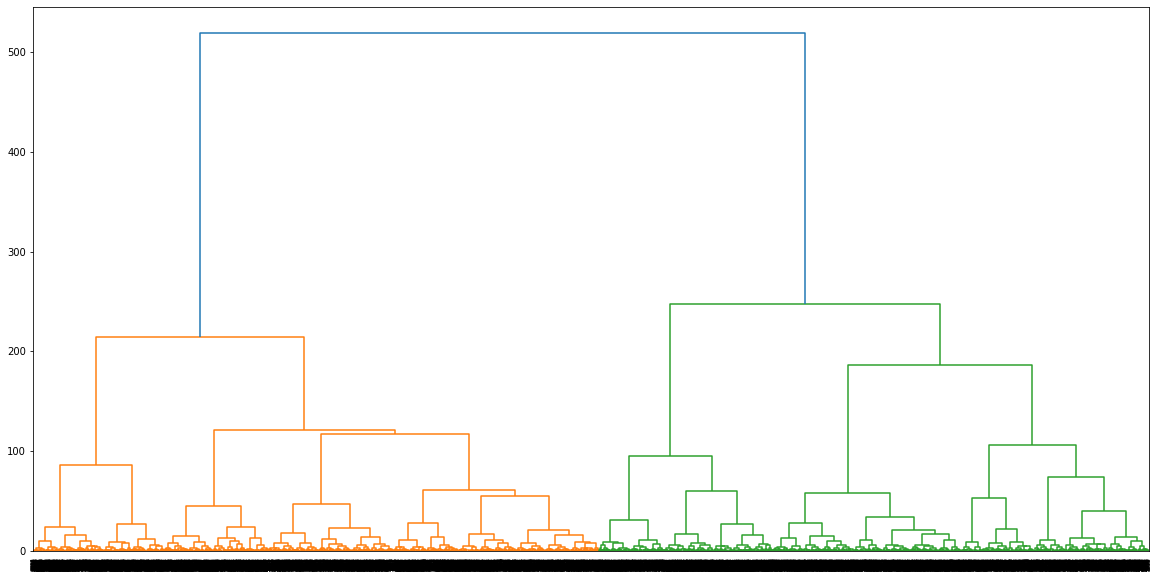

In [ ]:
#plt the dendrogram of data after UMAP with linkage method "ward"
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_df, method='ward'))
plt.show()

In [ ]:
# writ the Silhouette score into DataFrame

results = metrics.silhouette_score(umap_df, y_pred_agg_c, metric='euclidean')
sil_score_tot.loc['agglorative_UMAP'] = results

In [ ]:
#From the above investigation, one observation is that: 
#(1) Using UMAP as input, the data is well separated, as observed in Kmeans
#(2) It looks when using linkage option "complete", the pattern of data separation is very close to Kmeans

##(3) DBSCAN

In [ ]:
dbscan_cluster = DBSCAN(eps=3, min_samples=20)
y_pred_dbscan = dbscan_cluster.fit_predict(df_scl)
print(metrics.silhouette_score(df_scl, y_pred_dbscan, metric='euclidean'))

0.5980781149593835


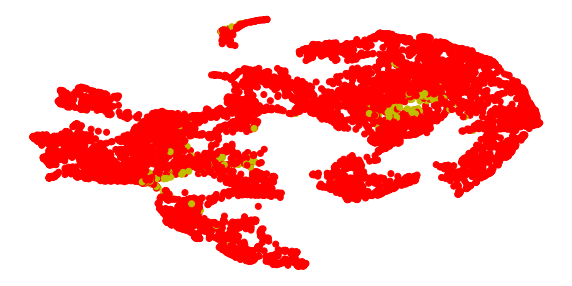

In [ ]:
plt_opt(y_pred_dbscan)

In [ ]:
np.unique(y_pred_dbscan)
#Looks like DBSCAN defined the data into one cluster, and others are noises

array([-1,  0], dtype=int64)

In [ ]:
for i in np.arange(0.5, 2, 0.4):
    dbscan_cluster=DBSCAN(eps=i, min_samples=20)
    y_pred_dbscan = dbscan_cluster.fit_predict(df_scl)
    print(metrics.silhouette_score(df_scl, y_pred_dbscan, metric='euclidean'))
    print(np.unique(y_pred_dbscan))

-0.2586632283389737
[-1  0  1  2  3  4]
0.0865567555571348
[-1  0]
0.11187164817313007
[-1  0  1  2]
0.3585335851490105
[-1  0]


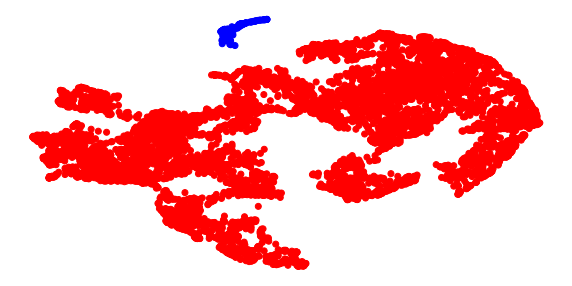

In [ ]:
dbscan_cluster=DBSCAN(eps=1.3, min_samples=20)
y_pred_dbscan = dbscan_cluster.fit_predict(umap_df)
plt_opt(y_pred_dbscan)

In [ ]:
#DBSCAN is not very helpful in this case, as change the eps lower, the Silhouette score is negative; if increase eps value, 
#the Silhouette score is higher, however, it only identify one cluster. 
#
#So we will not use DBSCAN for this dataset

## (4) Gaussian mixture model

In [ ]:
#Let's get an initial Gaussian mixture model using data before UMAP 
gmm_cluster = GaussianMixture(n_components=3, random_state=123)
y_pred_gmm = gmm_cluster.fit_predict(df_scl)
print(metrics.silhouette_score(df_scl, y_pred_gmm, metric='euclidean'))

0.11512267967773161


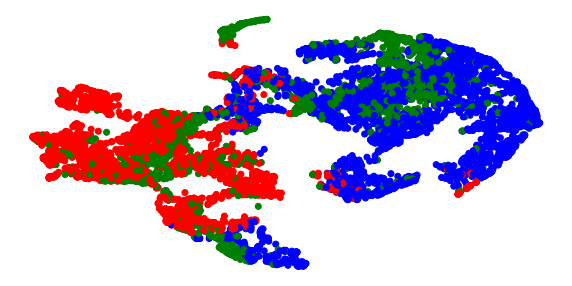

In [ ]:
plt_opt(y_pred_gmm)

In [ ]:
#Let's get an initial Gaussian mixture model using data after UMAP 
gmm_cluster = GaussianMixture(n_components=3, random_state=123)
y_pred_gmm = gmm_cluster.fit_predict(umap_df)
print(metrics.silhouette_score(umap_df, y_pred_gmm, metric='euclidean'))

0.42006359


In [ ]:
#Add this Silhouette score into our dataframe for later model comparison/evaluation
print(metrics.silhouette_score(umap_df, y_pred_gmm, metric='euclidean'))
results = metrics.silhouette_score(umap_df, y_pred_gmm, metric='euclidean')
sil_score_tot.loc['gmm_UMAP'] = results

0.42006359


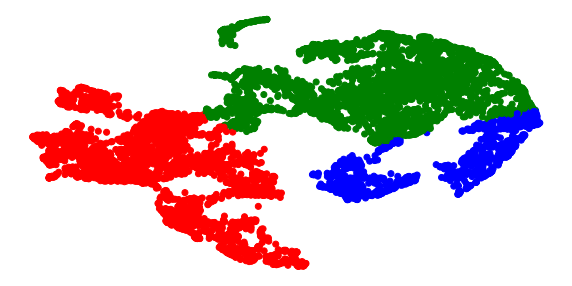

In [ ]:
plt_opt(y_pred_gmm)
#Looks like the data is well separated

0.49242356


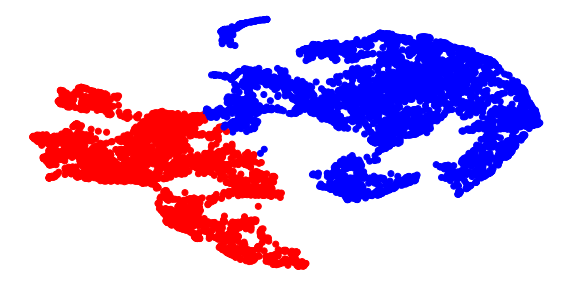

0.42006359


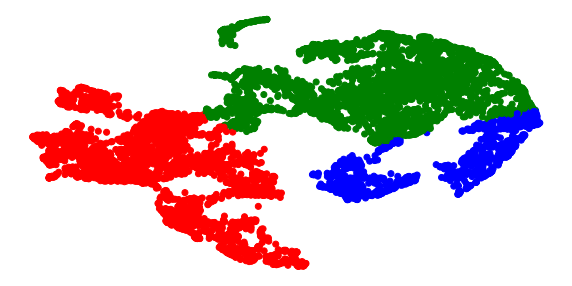

0.42083418


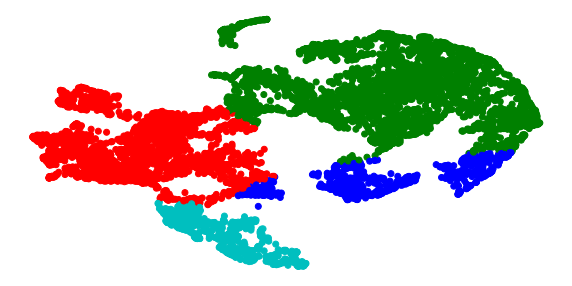

0.3906159


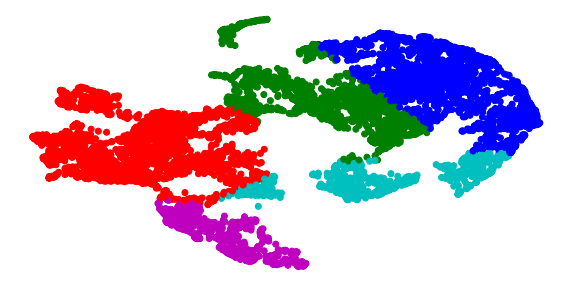

0.40204003


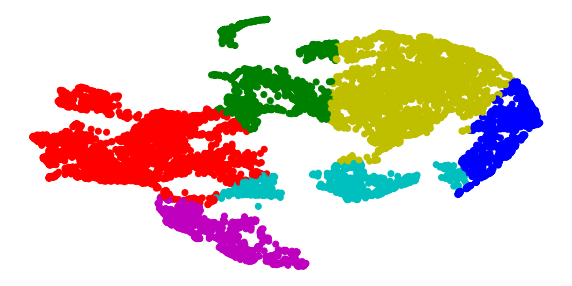

In [ ]:
#Let's visualize the cluster separation VS. different cluster number
for i in np.arange(2, 7, 1):
    gmm_cluster = GaussianMixture(n_components=i, random_state=123)
    y_pred_gmm = gmm_cluster.fit_predict(umap_df)
    print(metrics.silhouette_score(umap_df, y_pred_gmm, metric='euclidean'))
    plt_opt(y_pred_gmm)

In [ ]:
#Again, we will use cluster number =3 for this dataset

# **4. Comparison between different model and evaluation**

In [ ]:
#we will choose n_cluster =3 for all model. As observed above, using data after UMAP is better. So we will use label from UMAP clustering,
#and evaluate onto original data to see if the clustering is meaningfull
#We will evaluate Kmeans model/agglorative model/Gassian mixture model, as DBSCAN is not so useful as previously observed

## (1) Silhouette score

In [ ]:
#Let's compare the Silhouette score for Kmeans model/agglorative model/Gassian mixture model
#Looks like the Kmeans and agglorative model is comparable, slightly better than Gassian mixture model
sil_score_tot

,silhouette score
kmeans_UMAP,0.468010
agglorative_UMAP,0.451788
gmm_UMAP,0.420064


##(2) Visualization

In [ ]:
#there's some mismatch of the clustering number of Gassian mixture model and Kmeans/agglorative model. So we make it consistent 
y_pred_gmm_up = []
for i in y_pred_gmm:
    if i == 0:
        y_pred_gmm_up.append(2)
    elif i == 1:
        y_pred_gmm_up.append(1)
    else:
        y_pred_gmm_up.append(0)
y_pred_gmm_up = np.array(y_pred_gmm_up)

Text(0.5, 1.0, 'clustering using Gassian mixture model with UMAP as input')

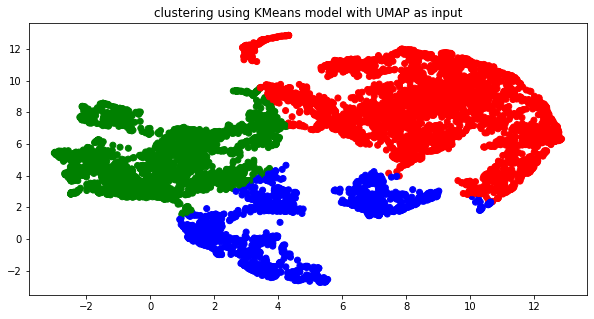

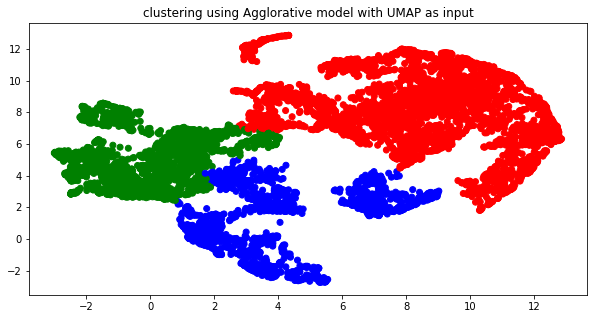

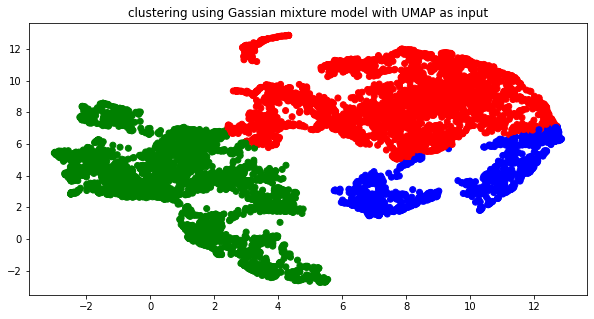

In [ ]:
fig = plt.figure(figsize=(10, 5))
colours = np.array(['r', 'b', 'g'])
plt.scatter(umap_df[:, 0], umap_df[:, 1], c=colours[y_pred_kmeans_umap])
plt.title('clustering using KMeans model with UMAP as input')

fig = plt.figure(figsize=(10, 5))
colours = np.array(['r', 'b', 'g'])
plt.scatter(umap_df[:, 0], umap_df[:, 1], c=colours[y_pred_agg_c])
plt.title('clustering using Agglorative model with UMAP as input')

fig = plt.figure(figsize=(10, 5))
colours = np.array(['r', 'b', 'g'])
plt.scatter(umap_df[:, 0], umap_df[:, 1], c=colours[y_pred_gmm_up])
plt.title('clustering using Gassian mixture model with UMAP as input')
#plt.xticks([])
#plt.yticks([])
#plt.show()

In [ ]:
#overall, the pattern are not that different. 
#However, we can clearly see that Kmeans and agglorative model is closer to each other, and Gassian Mixture model is slightly 
#different in the lower part
#Let's check the data and see how this clustering separate the data and what's the pattern

##(3) Checking back data to see if the clustering is meaningful

In [ ]:
df_tot_label = df_1.copy()
df_tot_label

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
#combine the three labels into the DataFrame
df_tot_label['label_kmeans'] = y_pred_kmeans_umap
df_tot_label['label_agg'] = y_pred_agg_c
df_tot_label['label_gmm'] = y_pred_gmm_up
df_tot_label

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label_kmeans,label_agg,label_gmm
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,1,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1,1,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1,1,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1,1,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1,1,2


In [ ]:
df_tot_label.columns.shape[0]

20

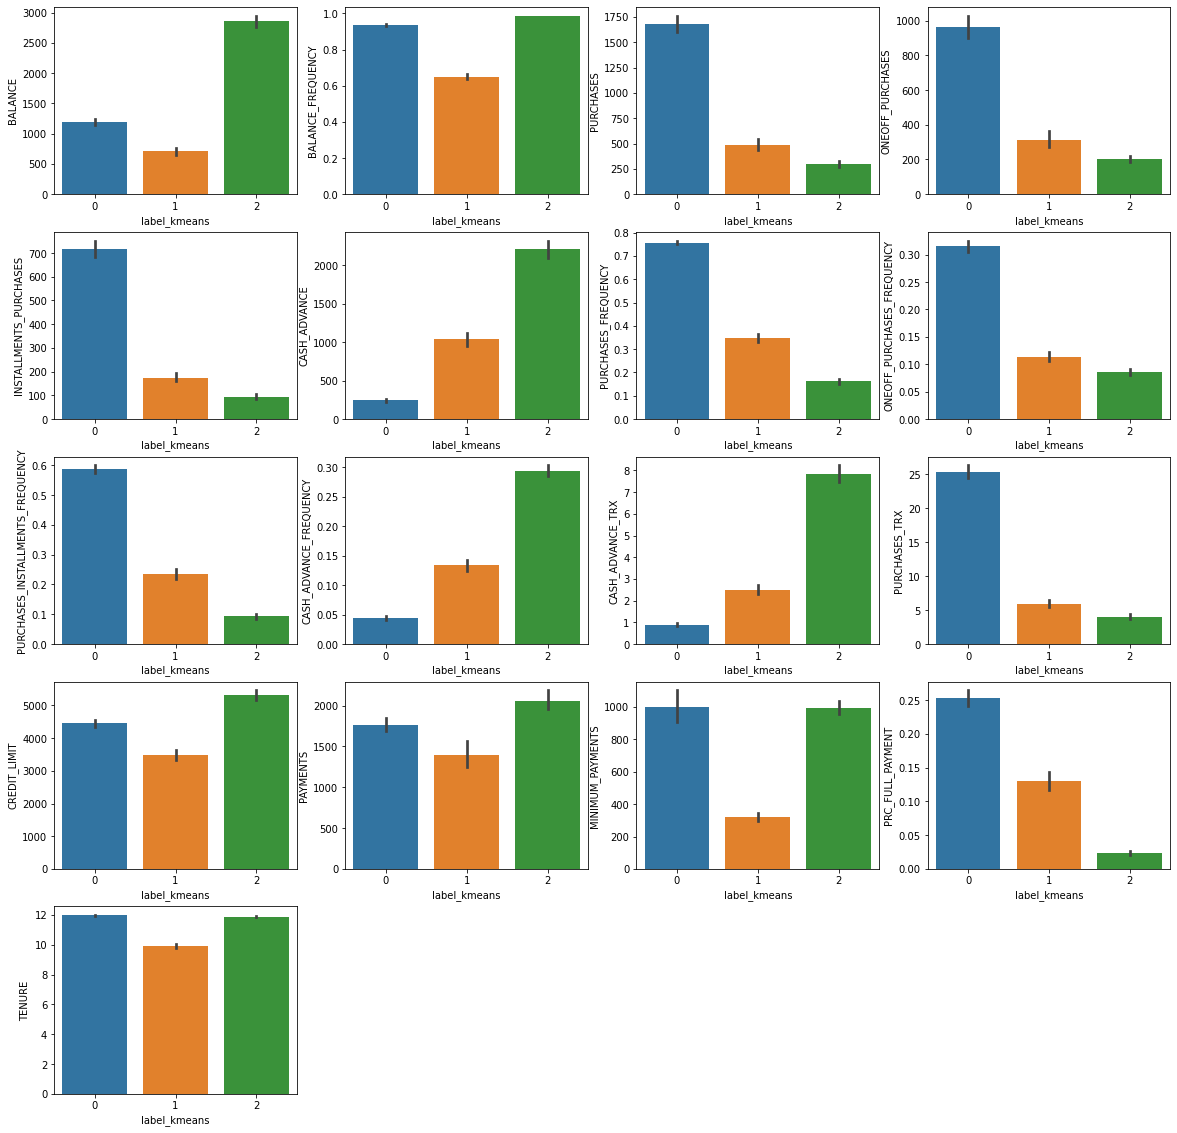

In [ ]:
#Let's check the mean value of each cluster for each feature. First check the Kmeans

fig = plt.figure(figsize=(20, 20))

for i in range(df_tot_label.columns.shape[0]-3):
    ax = fig.add_subplot(5, 4, i+1)
    sns.barplot(x='label_kmeans', y=df_tot_label.columns[i], data=df_tot_label)

In [ ]:
#Looks like there's some meaningful clustering, as the mean value is separated

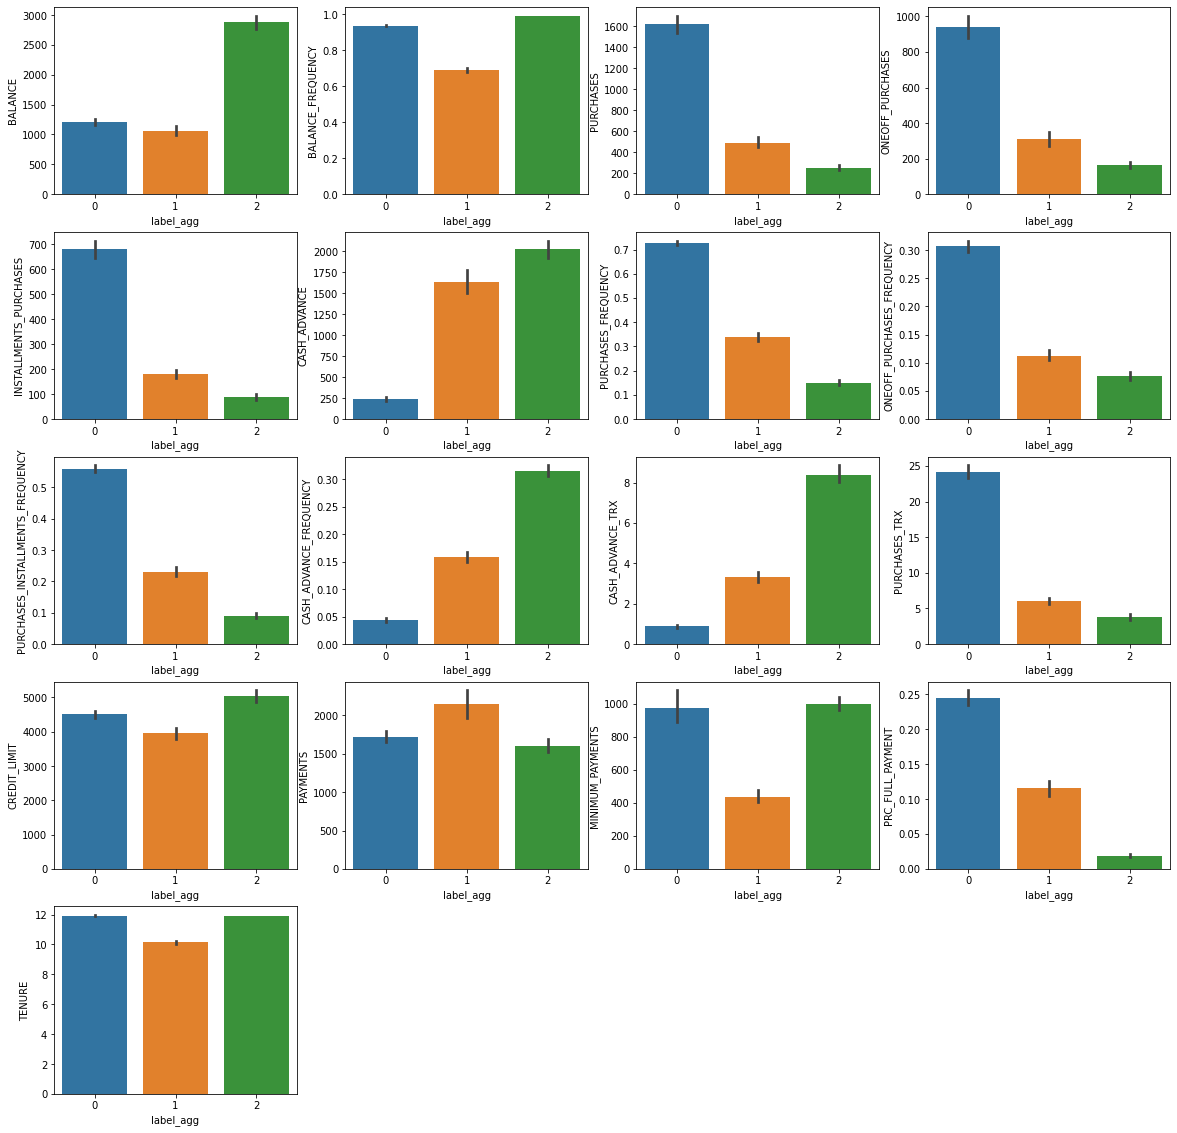

In [ ]:
# Mean value of each cluster for Agglorative model for each feature
fig = plt.figure(figsize=(20, 20))

for i in range(df_tot_label.columns.shape[0]-3):
    ax = fig.add_subplot(5, 4, i+1)
    sns.barplot(x='label_agg', y=df_tot_label.columns[i], data=df_tot_label)

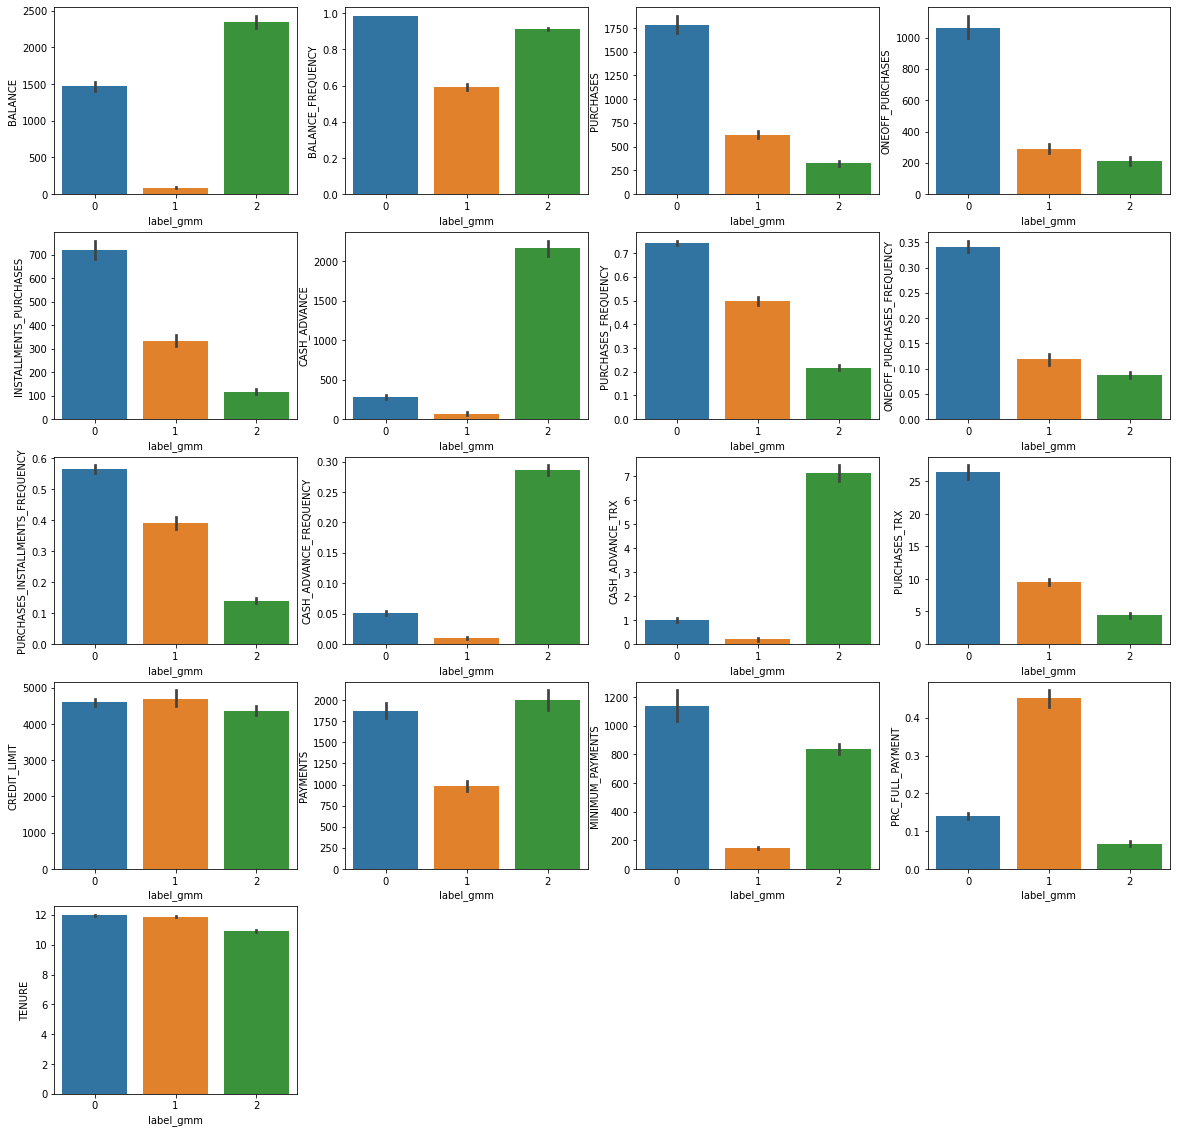

In [ ]:
# Mean value of each cluster for Gaussian mixture model for each feature
fig = plt.figure(figsize=(20, 20))

for i in range(df_tot_label.columns.shape[0]-3):
    ax = fig.add_subplot(5, 4, i+1)
    sns.barplot(x='label_gmm', y=df_tot_label.columns[i], data=df_tot_label)

In [ ]:
#Now let's see the distribution of each feature under different clustering

In [ ]:
df_kmeans_c0 = df_tot_label[df_tot_label['label_kmeans']==0]
df_kmeans_c1 = df_tot_label[df_tot_label['label_kmeans']==1]
df_kmeans_c2 = df_tot_label[df_tot_label['label_kmeans']==2]

In [ ]:
df_agg_c0 = df_tot_label[df_tot_label['label_agg']==0]
df_agg_c1 = df_tot_label[df_tot_label['label_agg']==1]
df_agg_c2 = df_tot_label[df_tot_label['label_agg']==2]

In [ ]:
df_gmm_c0 = df_tot_label[df_tot_label['label_gmm']==0]
df_gmm_c1 = df_tot_label[df_tot_label['label_gmm']==1]
df_gmm_c2 = df_tot_label[df_tot_label['label_gmm']==2]

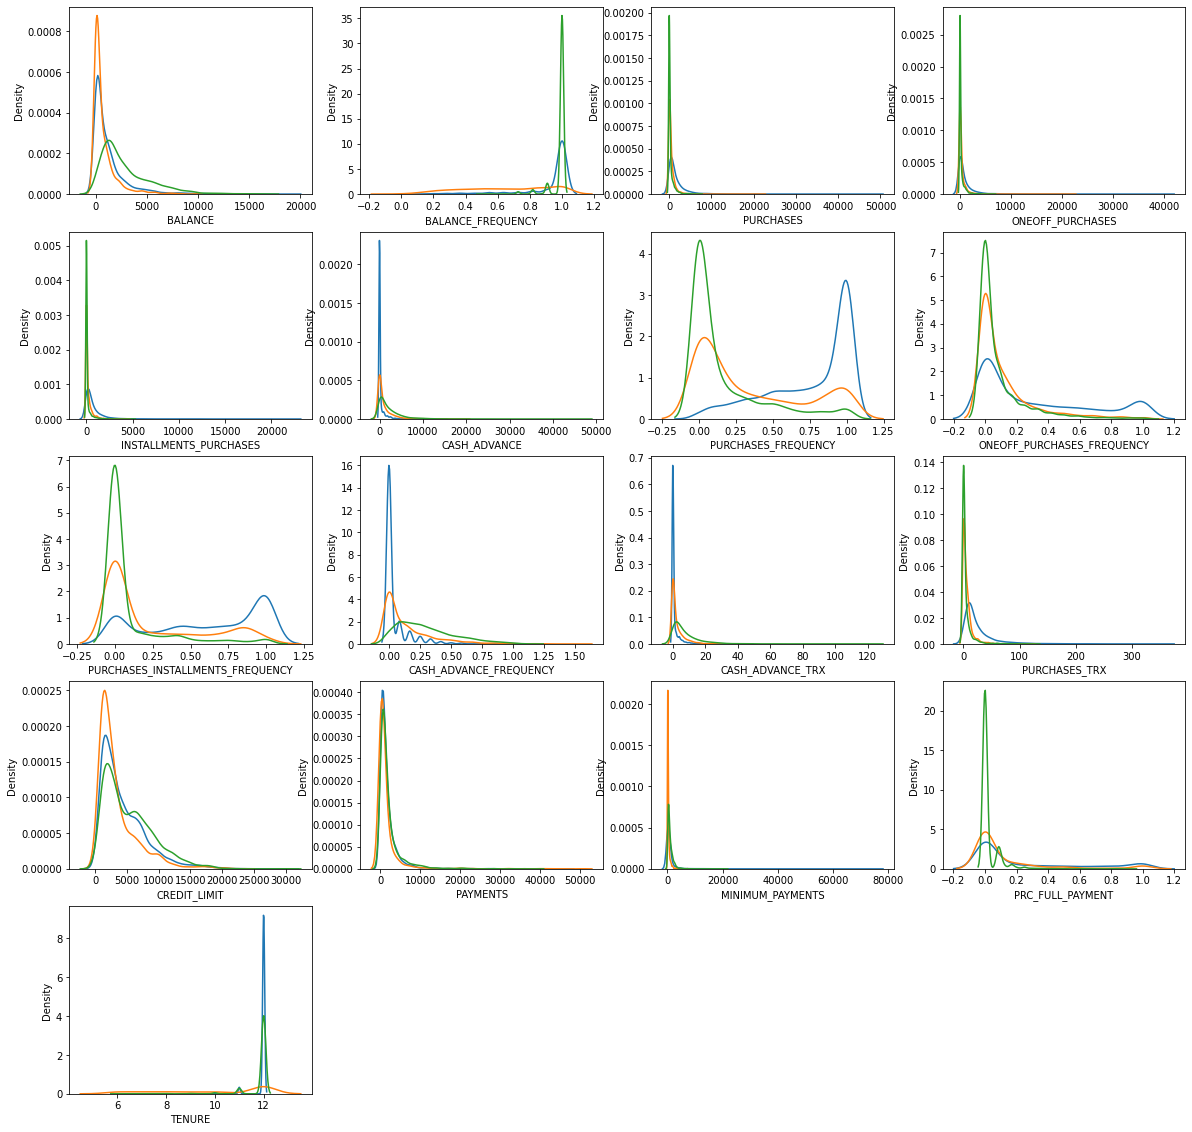

In [ ]:

fig = plt.figure(figsize=(20, 20))

for i in range(df_kmeans_c0.columns.shape[0]-3):
    axes = fig.add_subplot(5, 4, i+1)
    sns.distplot(df_kmeans_c0[df_kmeans_c0.columns[i]], hist=False, ax = axes)
    sns.distplot(df_kmeans_c1[df_kmeans_c0.columns[i]], hist=False, ax = axes)
    sns.distplot(df_kmeans_c2[df_kmeans_c0.columns[i]], hist=False, ax = axes)


In [ ]:
# Observations:
#(1) All three models are meaningful clustering. the Silhouette score of Gassian Mixture is slightly lower. The Kmeans is the
#highest
#(2) Using UMAP as dimentionality reduction and input of clustering, and Kmeans model with 3 clusters, it gives the best clustering